In [115]:
import numpy as np
import numpy.random as np_rand
import matplotlib.pyplot as plt
import math
n = 50
points = np_rand.randint(0,1000,(n,2))

In [88]:
def energy(points):
    n = len(points)
    sum = 0
    for i in range(0,n-1):
        sum += math.sqrt((points[i+1,0]-points[i,0])**2+(points[i+1,1]-points[i,1])**2)
    sum += math.sqrt((points[0,0]-points[-1,0])**2+(points[0,1]-points[-1,1])**2)
    return sum

In [89]:
def plot_points(points):
    plt.plot(points[:,0],points[:,1],'-o',color='b')
    plt.plot([points[0,0],points[-1,0]],[points[0,1],points[-1,1]],'-o',color='b')
    plt.show()

In [90]:
def lin_schedule(t_0, k, n):
    a = np.linspace(0,t_0,n)
    return -a[k]+t_0

In [91]:
def close_neighbours(s, n):
    if len(s) < 2:
        raise("state vector is too short")
    a = []
    perm = []
    for i in range(0,n):
        copy = s.copy()
        j = np_rand.randint(0,len(s)-2)
        if j not in perm:
            perm.append(j)        
            copy[j+1], copy[j] = copy[j].copy(), copy[j+1].copy()
            a.append(copy)
    return a

In [92]:
def far_neighbours(s, n):
    if len(s) < 2:
        raise("state vector is too short")
    a = []
    for i in range(0,n):
        copy = s.copy()
        j1 = np_rand.randint(0,len(s)-1)
        j2 = np_rand.randint(0,len(s)-1)
        if j1 != j2:    
            copy[j1], copy[j2] = copy[j2].copy(), copy[j1].copy()
            a.append(copy)
    return a

In [93]:
def p(e, e_new, t):
    return math.exp(-(e_new - e)/t)

In [112]:
def sim_an(s, k_max, t_0, t_1, p, schedule, neighbours, energy, neighbours_num):
    for i in range(0, 5):
        for k in range(0, k_max):
            t = schedule(t_0, k, k_max)
            a = neighbours(s, neighbours_num)
            for s_new in a:
                if p(energy(s), energy(s_new), t) >= np_rand.random():
                    s = s_new
            if math.isclose(t_1, t, rel_tol = 0.01):
                break
    return s

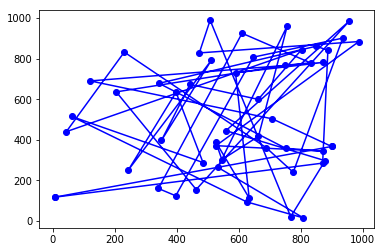

23453.84458259979


/home/yurii/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


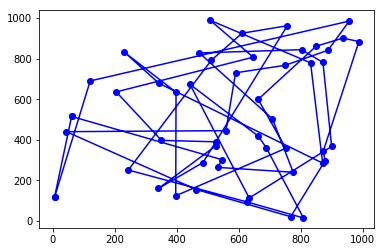

16506.101100601547


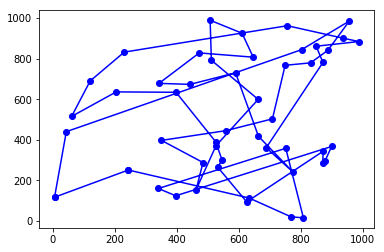

10788.073079917536


In [117]:
plot_points(points)
print(energy(points))
s = sim_an(points, 2000, 10000, 1, p, lin_schedule, close_neighbours, energy, 20)
plot_points(s)
print(energy(s))
s = sim_an(points, 2000, 10000, 1, p, lin_schedule, far_neighbours, energy, 25)
plot_points(s)
print(energy(s))